# Path integral Monte Carlo для модели мягких сфер

Канонический ансамбль, частицы представляют собой замкнутые ломаные, количество вершин $P$, координаты вершины обозначаются $r_i^{\nu}$, $\nu$ - номер частицы ($1\leq\nu\leq N$); $i$ - индекс вершины ($1\leq i\leq P$). Эффективный потенциал взаимодействия:

$$
    V_{\text{eff}}=\sum\limits_{\nu=1}^N\sum\limits_{i=1}^P\frac{\left(r_i^{\nu}-r_{i+1}^{\nu}\right)^2}{4\lambda\tau^2}+
    \sum\limits_{\nu>\mu}^N\sum\limits_{i=1}^PV_2\left(r_i^{\nu}-r_i^{\mu}\right)
$$

Здесь $\lambda=\frac{\hbar^2}{2m}$, $\tau=\frac{\beta}{P}$; $\beta=\frac{1}{T}$; $V_2(r)=\varepsilon\left(\frac{\sigma}{r}\right)^n$

Частицы - атомы $He$, расчёты в системе СИ. Параметры потенциала: $\sigma=2,6 \mathrm{A}$, $\frac{\varepsilon}{k_{\text{Б}}}=10,22\text{K}$. Температура $T=30\text{K}$, плотность $\rho = 0,13  \frac{\text{гр.}}{\text{см}^3}$. 

В начальный момент все ломаные стянуты в точку, частицы расположены в узлах кубической решётки. $P=3$, $N=125$. 

Моделирование с помощью алгоритма метрополиса:
* выбираем случайную частицу;
* выбираем вершину ломаной;
* сдвигаем её на случайное расстояние
* считаем изменение энергии
$$
    \Delta E_{\text{kin}}=\frac{1}{4\lambda\tau}\left[
    \left(r_i^{\nu^{\text{new}}}-r_{i-1}^{\nu}\right)^2+
    \left(r_i^{\nu^{\text{new}}}-r_{i+1}^{\nu}\right)^2-
    \left(r_i^{\nu^{\text{old}}}-r_{i-1}^{\nu}\right)^2-
    \left(r_i^{\nu^{\text{old}}}-r_{i+1}^{\nu}\right)^2
    \right]\\
    \Delta E_{\text{pot}}=\tau\sum\limits_{\nu\neq\mu}^N\left[
    V_2\left(r_k^{\mu^{\text{new}}}-r_k^{\nu}\right)-
    V_2\left(r_k^{\mu^{\text{old}}}-r_k^{\nu}\right)
    \right]\\
    \Delta E = \Delta E_{\text{kin}}+\Delta E_{\text{pot}}
$$
Здесь $\nu$ - случайно выбранная частица, $k$ - случайно выбранная вершина ломаной.

* Если $\Delta E <0$, то принимаем конфигурацию.
* Иначе, если $\xi<\exp(-\Delta E)$, $\xi\in(0,1)$, то принимаем конфигурацию.
* Иначе берём старую вместо новой.

### Вычислить эволюцию энергии, убедиться, что частицы стали неточечными. Сравнить с $T=300\text{K}$.

$$
    \begin{cases}
        \hbar = 1,05\cdot10^{-34}\text{Дж}\cdot\text{с}=1,05\cdot10^{-24}\text{H}\cdot\text{A}\cdot{c}\\
        m = 6,65\cdot10^{-27}\text{кг}\\
        \lambda=\frac{\hbar^2}{2m}=8,29\cdot10^{-13}\text{H}\cdot\text{A}^3=8,29 \text{XX}\cdot\text{A}^3\\
        a = \left(\frac{m}{\rho}\right)^{\frac{1}{3}}=3,71\text{A}\\
        k_{\text{Б}}=1,38\cdot10^{-23}\frac{\text{Дж}}{\text{K}}=1,38\cdot10^{-13}\frac{\text{H}\cdot\text{A}}{\text{K}}\\
        \varepsilon = 1,41\cdot10^{-12}\text{H}\cdot\text{A}=14,1\text{XX}\cdot\text{A}\\
        \sigma = 2,6\text{A}
    \end{cases}
$$
Здесь введено обозначение $10^{-13}\cdot\text{H}=\text{XX}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [2]:
#Constants
sigma = 2.6     #soft spheres potential's parameter
n = 6           #soft spheres potential's parameter
epsilon = 14.1  #soft spheres potential's parameter

a = 3.71        #size of lattice
lambbda = 8.29
P = 3           #number of vertices in polygonal line
N = 125         #number of particles in system
T = 30          #temperature of a system


def V_2(r, epsilon=epsilon, sigma=sigma, n=n):
    return epsilon * (sigma / r)**n
def tau(T, P=P):
    return 1/(T * P)

In [3]:
def generate_initial_polygonal(x, y, z, P=P):
    polygonal = np.zeros((P, 3))
    for i in range(P):
        polygonal[i] = [x, y, z]
    return polygonal

def generate_simple_cubic_cell(cubic_cell_size, P = P):
    cell = []
    for x in range(cubic_cell_size + 1):
        for y in range(cubic_cell_size + 1):
            for z in range(cubic_cell_size + 1):
                cell.append(generate_initial_polygonal(x * a, y * a, z * a, P))
    return cell

In [4]:
#Generators of random uniform value and random int
def next_random_uniform_value(delta = a/20):
    while 1:
        yield np.random.uniform(-1 * delta, delta)

def random_int_N(number_of_atoms = N):
    while 1:
        yield np.random.randint(number_of_atoms)

def random_int_P(number_of_vertices = P):
    while 1:
        yield np.random.randint(number_of_vertices)
        
        
ran_un_val = next_random_uniform_value()
ran_int_N = random_int_N()
ran_int_P = random_int_P()
#next(ran_un_val), next(ran_int_N), next(ran_int_P)

In [5]:
#Calculates distances between two vectors in a cell with periodic conditions
#N is a size of the lattice in a units
def distance(A, B, shift=5, a=a):
    distances = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            for k in range(-1, 2):
                distances.append(np.sqrt((A[0] + i * a * shift - B[0])**2 + 
                                      (A[1] + j * a * shift - B[1])**2 + 
                                      (A[2] + k * a * shift - B[2])**2))
    
    return min(distances)

In [6]:
#All atoms stay in initial box
def periodic_boundaries(number, shift=5, a=a):
    k = number
    if(k < 0):
        while (k < 0):
            k += shift * a
        return k
    elif(k > N * a):
        while (k > shift * a):
            k -= shift * a
        return k
    else:
        return k

In [7]:
cell = generate_simple_cubic_cell(int(N**(1/3)), P=P)

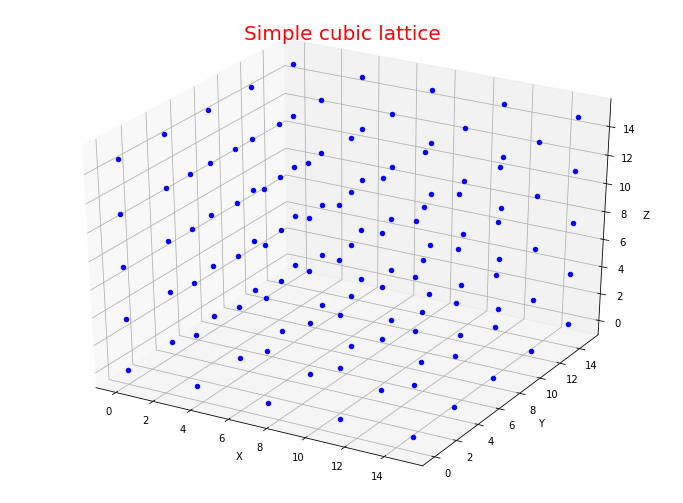

In [8]:
#Plot initial cell
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for coord in cell:
    ax.scatter(coord[0][0], coord[0][1], coord[0][2], color='blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Simple cubic lattice", fontsize=20, color='red')

plt.show()

In [9]:
def metropolis_algorithm_condition(cell, accepted, non_accepted):
    nu = next(ran_int_N)
    k = next(ran_int_P)
    
    coord_old = cell[nu][k]
    coord_new = (periodic_boundaries(next(ran_un_val) + coord_old[0]), \
                 periodic_boundaries(next(ran_un_val) + coord_old[1]), \
                 periodic_boundaries(next(ran_un_val) + coord_old[2]))    
    def delta_E_kin(nu=nu, k=k):
        return (distance(coord_new, cell[nu][(k+2)%P])**2 + \
                distance(coord_new, cell[nu][(k+1)%P])**2 - \
                distance(coord_old, cell[nu][(k+2)%P])**2 - \
                distance(coord_old, cell[nu][(k+1)%P])**2) / (4 * lambbda * tau(T))
    
    def delta_E_pot(nu=nu, k=k):
        delta_E_pot = 0
        for ii in range(N):
            for jj in range(N):
                for kk in range(P):
                    if (ii > jj):
                        delta_E_pot += V_2(distance(cell[ii][kk], cell[jj][kk]))
        return delta_E_pot
    
                     
    delta_E = delta_E_kin() + delta_E_pot()
    
    if (delta_E < 0):
        accepted += 1
        return coord_new, delta_E, nu, k, accepted, non_accepted
    elif(delta_E > 0 and np.random.random() < np.exp(-1 * delta_E)):
        accepted += 1
        return coord_new, delta_E, nu, k, accepted, non_accepted
    else:
        non_accepted += 1
        return coord_old, 0, nu, k, accepted, non_accepted

In [10]:
accepted = 0
nonaccepted = 0

In [11]:
metropolis_algorithm_condition(cell, accepted, nonaccepted)

(array([14.84, 14.84,  3.71]), 0, 121, 1, 0, 1)